### Гармонический осциллятор без трения

#### Уравнение движения:
$$
\ddot{x} + \omega^2 x = 0
$$
Здесь 𝜔 — угловая частота осциллятора.

- **Особая точка**: x = 0, v = 0 - точка равновесия.
- **Устойчивость**: устойчивая, замкнутые траектории на фазовой плоскости.
- **Интеграл энергии**:
$$
E = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}kx^2
$$
- **Потенциальная функция**:
$$
V(x) = \frac{1}{2}kx^2
$$

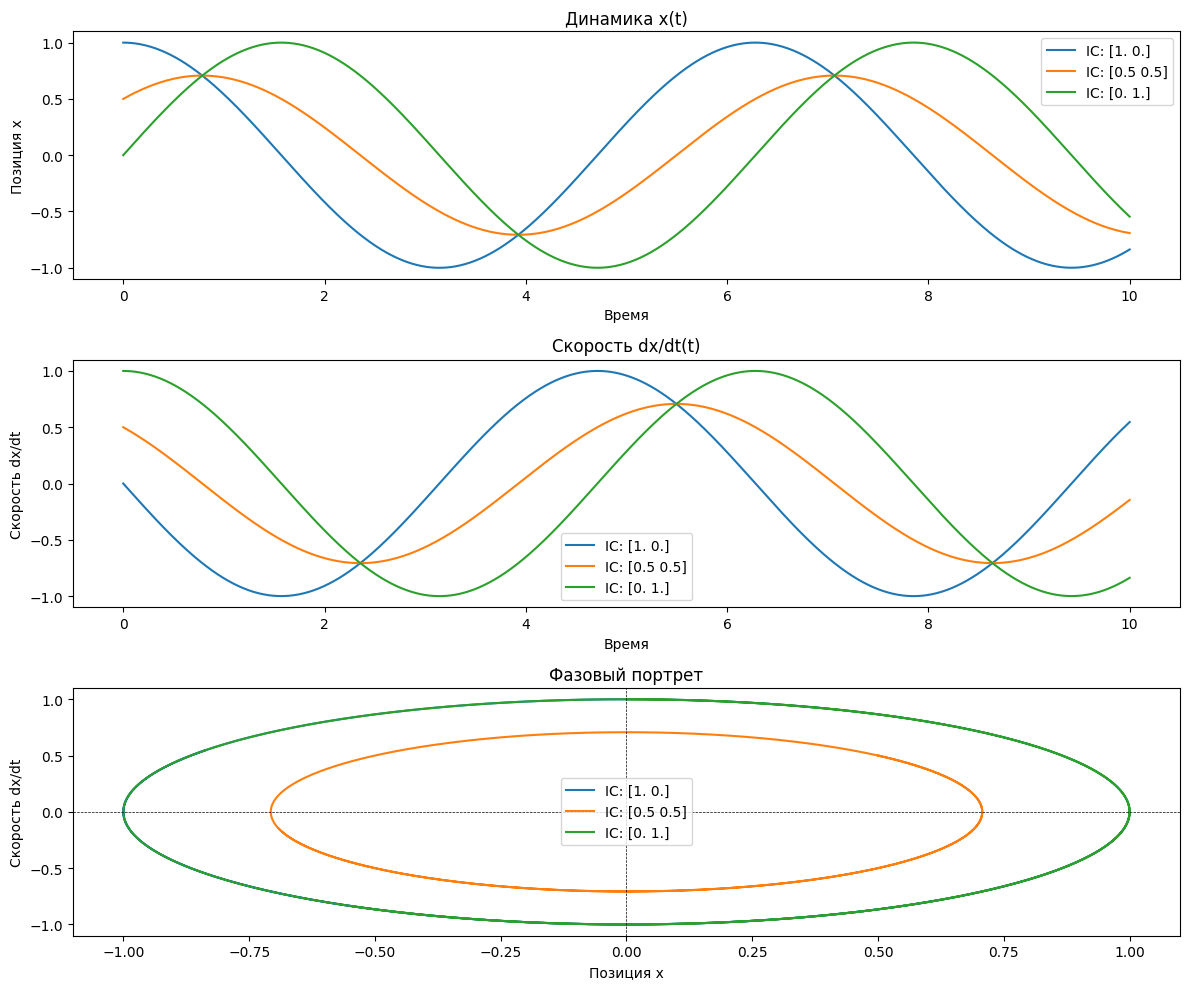

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры
m = 1.0          # Масса
omega = 1.0      # Частота
k = m * omega**2 # Жесткость

# Определяем уравнения движения
def harmonic_oscillator(t, y):
    return [y[1], -omega**2 * y[0]]

# Начальные условия (разные для анализа)
initial_conditions = [
    [1.0, 0.0],   # Начальная позиция 1, скорость 0
    [0.5, 0.5],   # Начальная позиция 0.5, скорость 0.5
    [0.0, 1.0]    # Начальная позиция 0, скорость 1
]

# Временной интервал
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Решаем уравнения для различных начальных условий
solutions = [solve_ivp(harmonic_oscillator, t_span, y0, t_eval=t_eval) for y0 in initial_conditions]

# Визуализация
plt.figure(figsize=(12, 10))

# Графики динамики x(t)
plt.subplot(3, 1, 1)
for sol in solutions:
    plt.plot(sol.t, sol.y[0], label=f'IC: {sol.y[:, 0]}')
plt.title('Динамика x(t)')
plt.xlabel('Время')
plt.ylabel('Позиция x')
plt.legend()

# Графики скорости dx/dt(t)
plt.subplot(3, 1, 2)
for sol in solutions:
    plt.plot(sol.t, sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Скорость dx/dt(t)')
plt.xlabel('Время')
plt.ylabel('Скорость dx/dt')
plt.legend()

# Фазовые портреты
plt.subplot(3, 1, 3)
for sol in solutions:
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Фазовый портрет')
plt.xlabel('Позиция x')
plt.ylabel('Скорость dx/dt')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

plt.tight_layout()
plt.show()


### Гармонический осциллятор с трением

#### Уравнение движения:
$$
\ddot{x} + 2\gamma\dot{x} + \omega^2 x = 0
$$
Здесь 𝛾 — коэффициент демпфирования.

- **Особая точка**: x = 0, v = 0.
- **Устойчивость**: устойчивая, траектории стремятся к точке равновесия.
- **Энергия**: уменьшается со временем из-за трения.

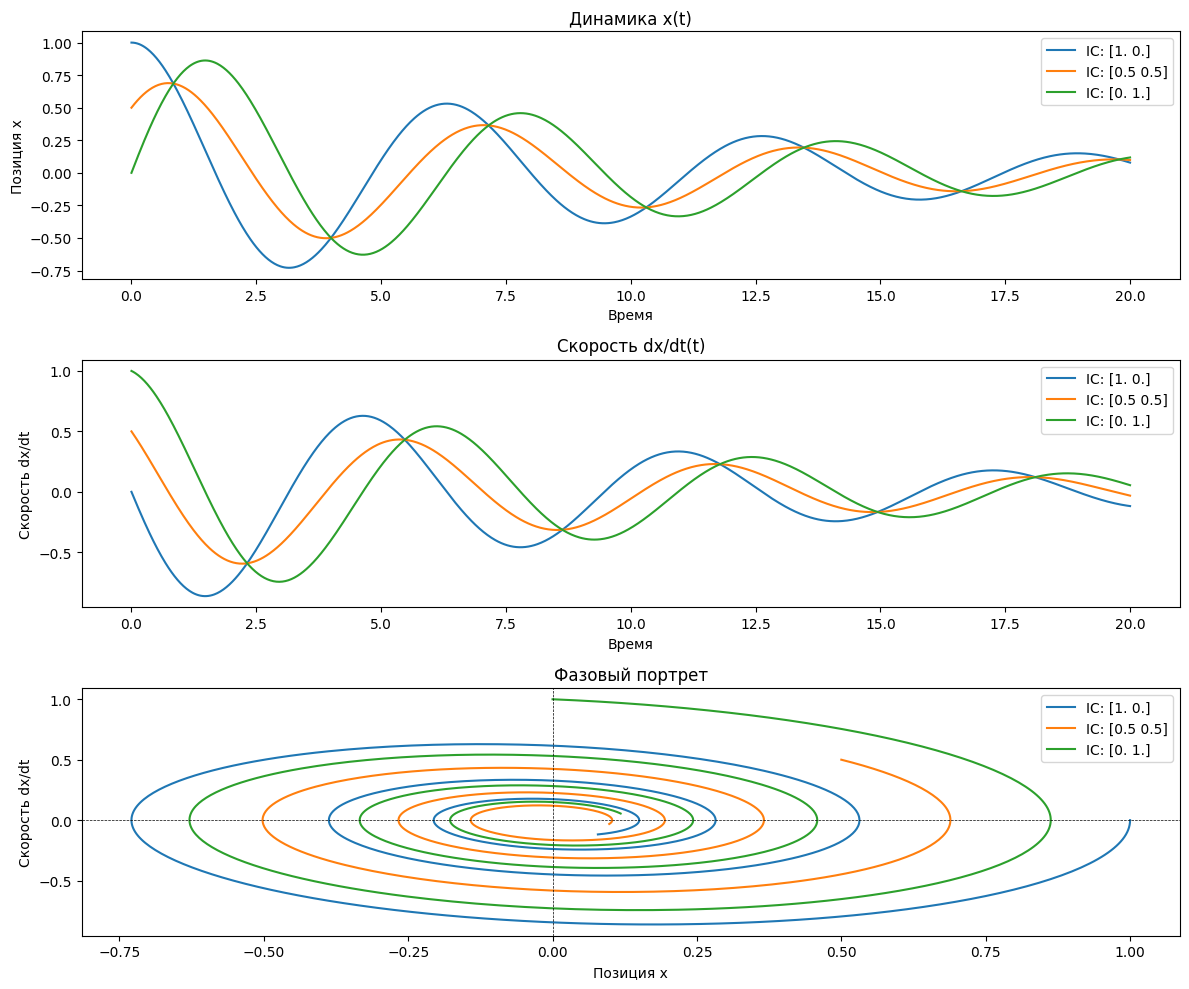

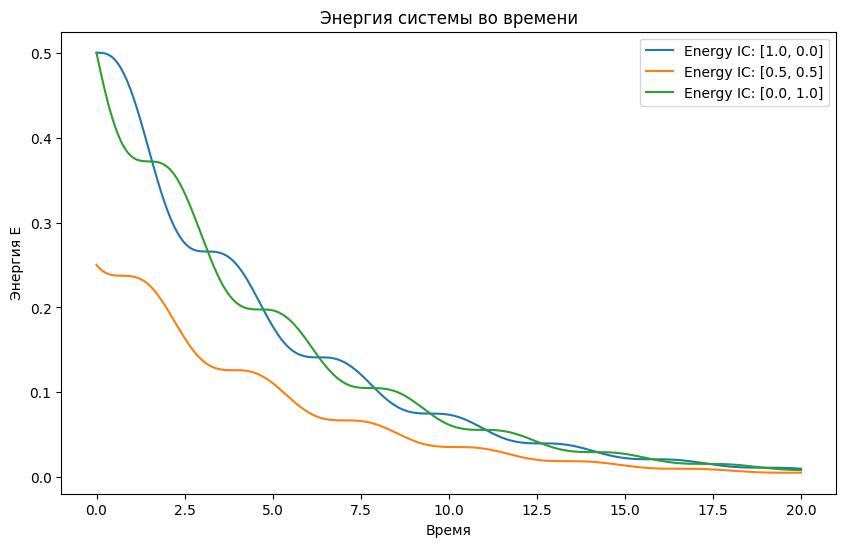

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры
m = 1.0          # Масса
omega = 1.0      # Частота
delta = 0.1      # Коэффициент трения
k = m * omega**2 # Жесткость

# Определяем уравнения движения
def harmonic_oscillator(t, y):
    return [y[1], -2 * delta * y[1] - omega**2 * y[0]]

# Начальные условия (разные для анализа)
initial_conditions = [
    [1.0, 0.0],   # Начальная позиция 1, скорость 0
    [0.5, 0.5],   # Начальная позиция 0.5, скорость 0.5
    [0.0, 1.0]    # Начальная позиция 0, скорость 1
]

# Временной интервал
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Решаем уравнения для различных начальных условий
solutions = [solve_ivp(harmonic_oscillator, t_span, y0, t_eval=t_eval) for y0 in initial_conditions]

# Визуализация
plt.figure(figsize=(12, 10))

# Графики динамики x(t)
plt.subplot(3, 1, 1)
for sol in solutions:
    plt.plot(sol.t, sol.y[0], label=f'IC: {sol.y[:, 0]}')
plt.title('Динамика x(t)')
plt.xlabel('Время')
plt.ylabel('Позиция x')
plt.legend()

# Графики скорости dx/dt(t)
plt.subplot(3, 1, 2)
for sol in solutions:
    plt.plot(sol.t, sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Скорость dx/dt(t)')
plt.xlabel('Время')
plt.ylabel('Скорость dx/dt')
plt.legend()

# Фазовые портреты
plt.subplot(3, 1, 3)
for sol in solutions:
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Фазовый портрет')
plt.xlabel('Позиция x')
plt.ylabel('Скорость dx/dt')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

plt.tight_layout()
plt.show()

# Анализ энергии
energies = []
for sol in solutions:
    energy = 0.5 * m * sol.y[1]**2 + 0.5 * k * sol.y[0]**2
    energies.append(energy)

# Построение графиков энергии
plt.figure(figsize=(10, 6))
for i, energy in enumerate(energies):
    plt.plot(sol.t, energy, label=f'Energy IC: {initial_conditions[i]}')
plt.title('Энергия системы во времени')
plt.xlabel('Время')
plt.ylabel('Энергия E')
plt.legend()
plt.show()


### Ангармонический осциллятор без трения

#### Уравнение движения:
$$
\ddot{x} + \omega^2 x + \alpha x^3 = 0
$$
Здесь 𝛼 — коэффициент нелинейности.

- **Особая точка**: x = 0, v = 0.
- **Устойчивость**: более сложная динамика, возможны бифуркации и хаотическое поведение.

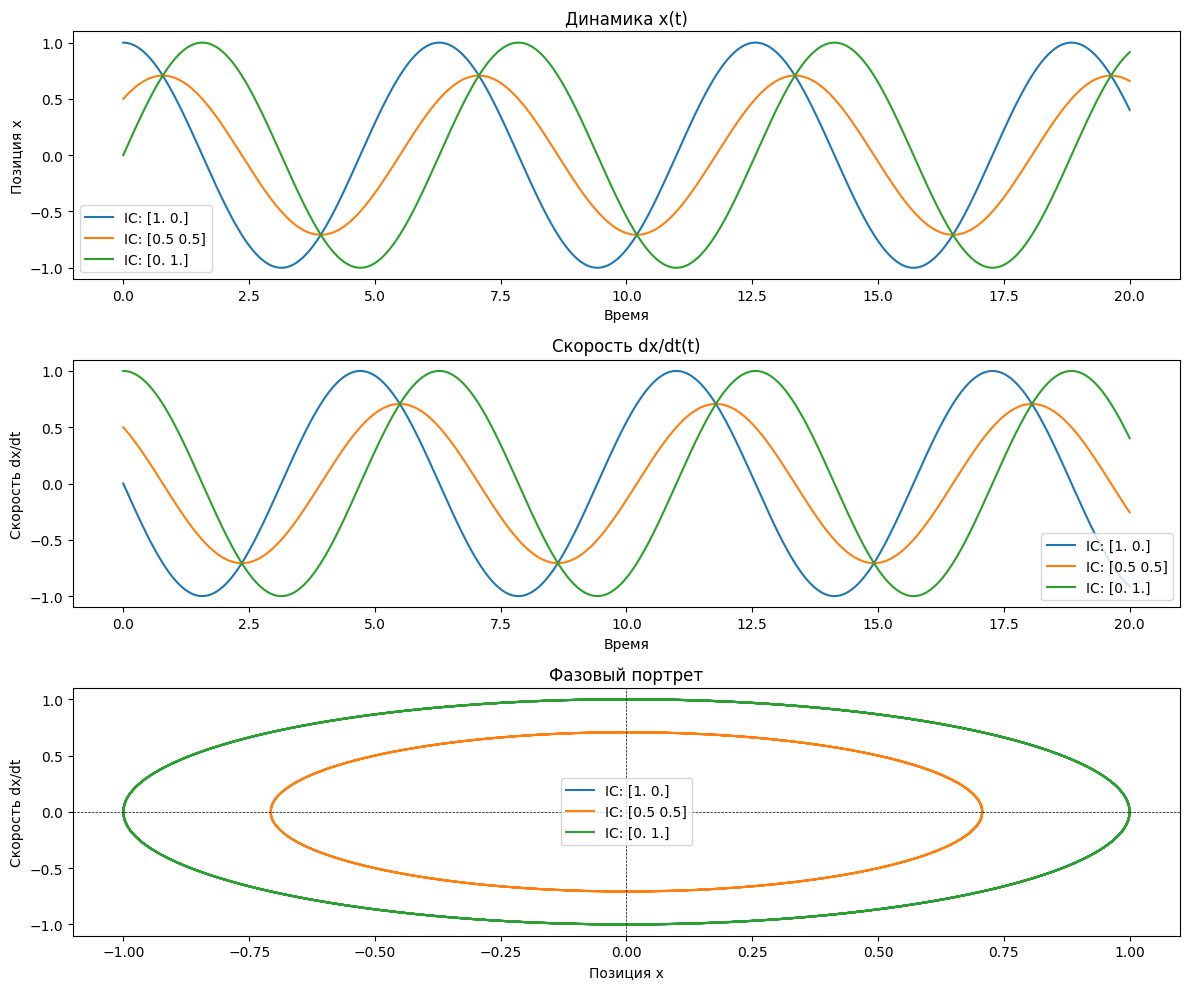

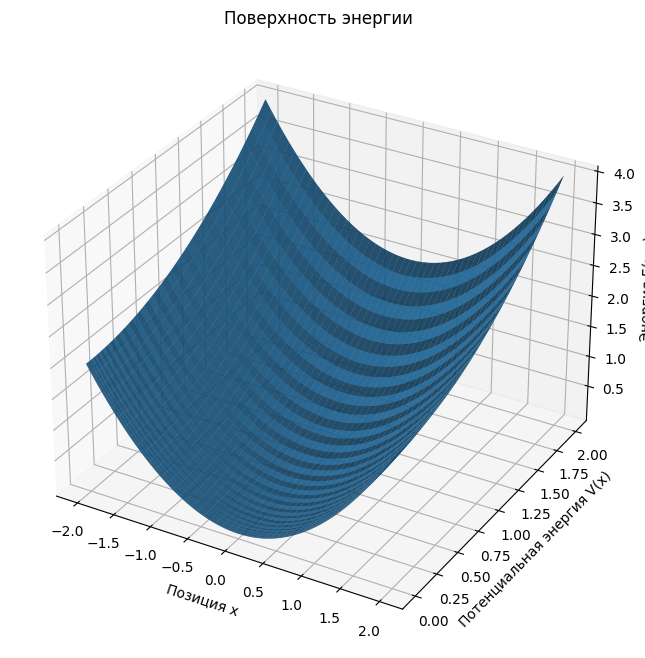

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Параметры
omega = 1.0  # Частота
k = 1.0      # Жесткость (m=1 для упрощения)

# Определяем уравнения движения
def harmonic_oscillator(t, y):
    return [y[1], -omega**2 * y[0]]

# 1. Определение особых точек
# Особые точки: x = 0, v = 0

# 2. Анализ устойчивости по Ляпунову
# Линейная система:
# dx/dt = v
# dv/dt = -omega^2 * x
# Характеристический полином: λ^2 + ω^2 = 0 -> λ = ±iω (мнимая пара)
# Устойчивость: центр (устойчивая особая точка)

# 3. Первый интеграл – интеграл энергии
# E = 1/2 * m * v^2 + 1/2 * k * x^2 (m=1)
def energy(x, v):
    return 0.5 * (v**2 + omega**2 * x**2)

# 4. Потенциальная функция
def potential(x):
    return 0.5 * omega**2 * x**2

# 5. Решения для различных начальных условий
initial_conditions = [
    [1.0, 0.0],   # Начальная позиция 1, скорость 0
    [0.5, 0.5],   # Начальная позиция 0.5, скорость 0.5
    [0.0, 1.0]    # Начальная позиция 0, скорость 1
]

# Временной интервал
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Решаем уравнения для различных начальных условий
solutions = [solve_ivp(harmonic_oscillator, t_span, y0, t_eval=t_eval) for y0 in initial_conditions]

# Графики динамики x(t) и dx/dt(t)
plt.figure(figsize=(12, 10))

# График x(t)
plt.subplot(3, 1, 1)
for sol in solutions:
    plt.plot(sol.t, sol.y[0], label=f'IC: {sol.y[:, 0]}')
plt.title('Динамика x(t)')
plt.xlabel('Время')
plt.ylabel('Позиция x')
plt.legend()

# График dx/dt(t)
plt.subplot(3, 1, 2)
for sol in solutions:
    plt.plot(sol.t, sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Скорость dx/dt(t)')
plt.xlabel('Время')
plt.ylabel('Скорость dx/dt')
plt.legend()

# Фазовые портреты
plt.subplot(3, 1, 3)
for sol in solutions:
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Фазовый портрет')
plt.xlabel('Позиция x')
plt.ylabel('Скорость dx/dt')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Построение поверхности энергии в зависимости от x и v
X = np.linspace(-2, 2, 100)
V = potential(X)
X, V = np.meshgrid(X, V)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, V, energy(X, V), alpha=0.7)
ax.set_title('Поверхность энергии')
ax.set_xlabel('Позиция x')
ax.set_ylabel('Потенциальная энергия V(x)')
ax.set_zlabel('Энергия E(x,v)')
plt.show()


### Ангармонический осциллятор с трением

#### Уравнение движения:
$$
\ddot{x} + 2\gamma\dot{x} + \omega^2 x + \alpha x^3 = 0
$$

- **Особая точка**: x = 0, v = 0.
- **Энергия**: уменьшается со временем за счёт трения, как и в случае гармонического осциллятора с трением.

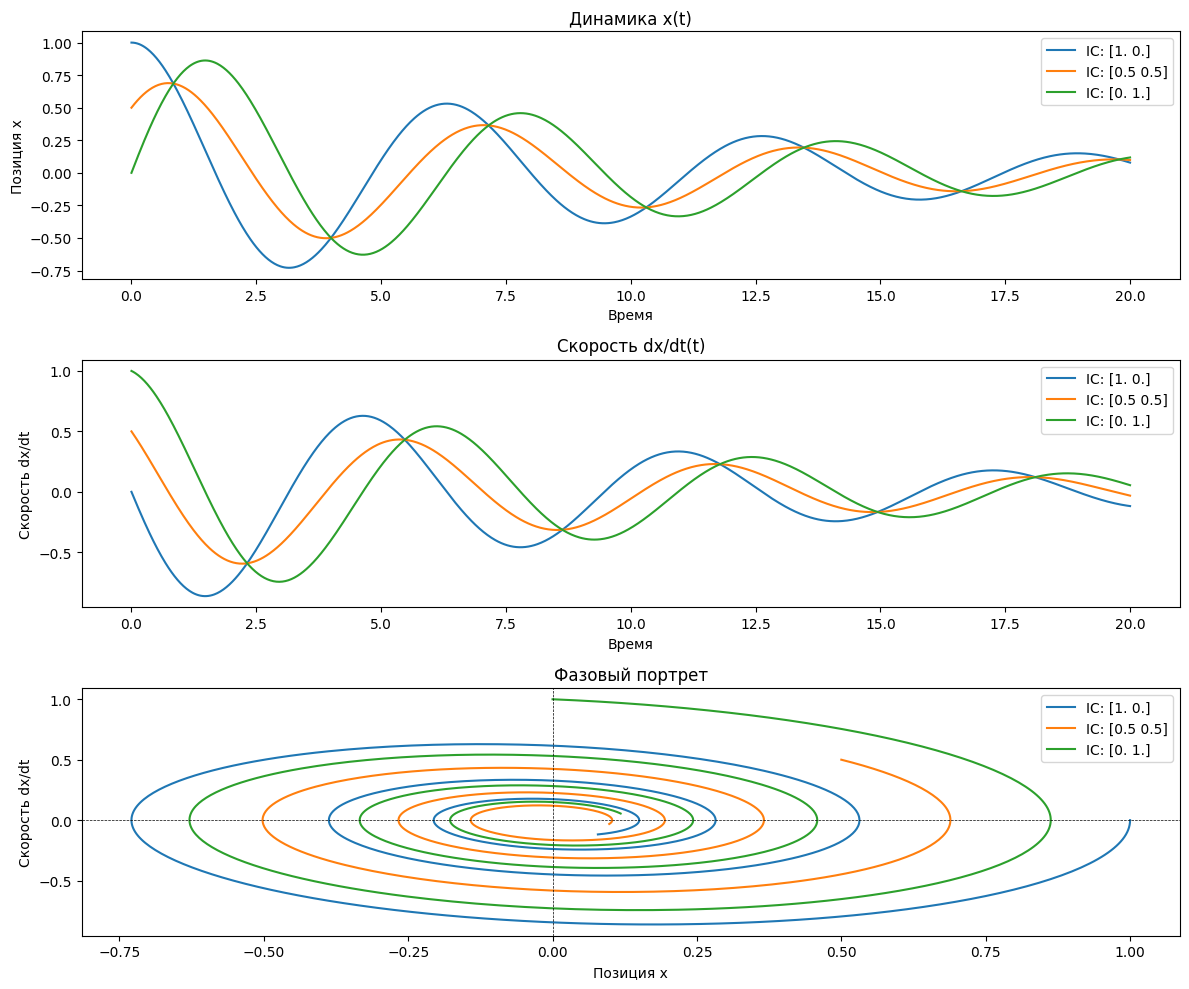

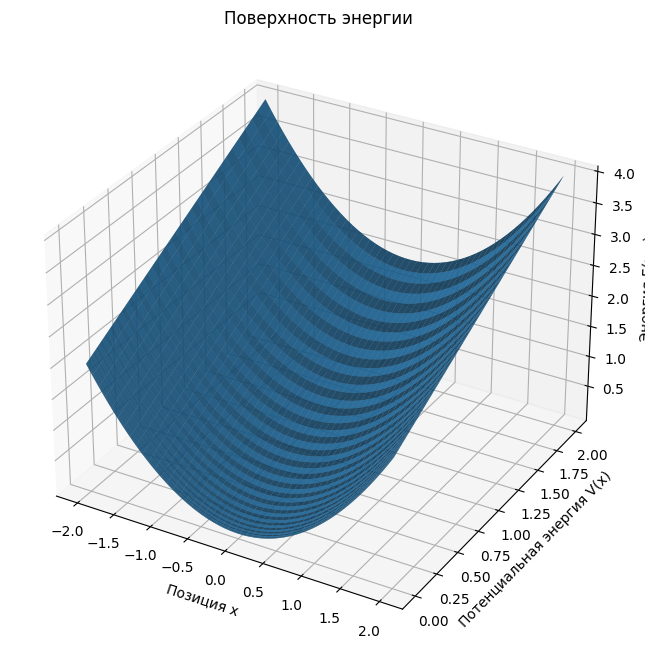

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Параметры
omega = 1.0  # Частота
delta = 0.1  # Коэффициент трения

# Определяем уравнения движения
def anharmonic_oscillator(t, y):
    return [y[1], -2 * delta * y[1] - omega**2 * y[0]]

# 1. Определение особых точек
# Особые точки: x = 0, v = 0 (устойчивая точка)

# 2. Анализ устойчивости по Ляпунову
# Линейная система:
# dx/dt = v
# dv/dt = -2δv - ω²x
# Характеристический полином: λ² + 2δλ + ω² = 0
# Корни: λ = -δ ± √(δ² - ω²)
# Если δ > ω, система имеет две действительные отрицательные корни (устойчивая особая точка).
# Если δ < ω, система имеет комплексные корни (центр).

# 3. Первый интеграл – интеграл энергии
def energy(x, v):
    return 0.5 * (v**2 + omega**2 * x**2)

# 4. Потенциальная функция
def potential(x):
    return 0.5 * omega**2 * x**2

# 5. Решения для различных начальных условий
initial_conditions = [
    [1.0, 0.0],   # Начальная позиция 1, скорость 0
    [0.5, 0.5],   # Начальная позиция 0.5, скорость 0.5
    [0.0, 1.0]    # Начальная позиция 0, скорость 1
]

# Временной интервал
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Решаем уравнения для различных начальных условий
solutions = [solve_ivp(anharmonic_oscillator, t_span, y0, t_eval=t_eval) for y0 in initial_conditions]

# Графики динамики x(t) и dx/dt(t)
plt.figure(figsize=(12, 10))

# График x(t)
plt.subplot(3, 1, 1)
for sol in solutions:
    plt.plot(sol.t, sol.y[0], label=f'IC: {sol.y[:, 0]}')
plt.title('Динамика x(t)')
plt.xlabel('Время')
plt.ylabel('Позиция x')
plt.legend()

# График dx/dt(t)
plt.subplot(3, 1, 2)
for sol in solutions:
    plt.plot(sol.t, sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Скорость dx/dt(t)')
plt.xlabel('Время')
plt.ylabel('Скорость dx/dt')
plt.legend()

# Фазовые портреты
plt.subplot(3, 1, 3)
for sol in solutions:
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {sol.y[:, 0]}')
plt.title('Фазовый портрет')
plt.xlabel('Позиция x')
plt.ylabel('Скорость dx/dt')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Построение поверхности энергии в зависимости от x и v
X = np.linspace(-2, 2, 100)
V = potential(X)
X, V = np.meshgrid(X, V)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
E = energy(X, np.sqrt(2 * (V - potential(0))))  # Энергия как функция от x и v
ax.plot_surface(X, V, E, alpha=0.7)
ax.set_title('Поверхность энергии')
ax.set_xlabel('Позиция x')
ax.set_ylabel('Потенциальная энергия V(x)')
ax.set_zlabel('Энергия E(x,v)')
plt.show()
